### 다중회귀 - 보스톤 주택 가격

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- Feature별 산점도와 선형회귀선

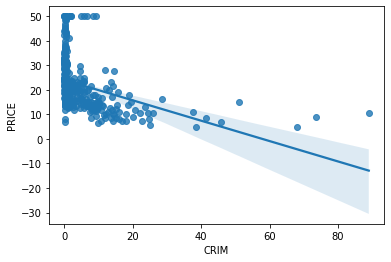

In [8]:
sns.regplot(x='CRIM', y='PRICE', data=df);

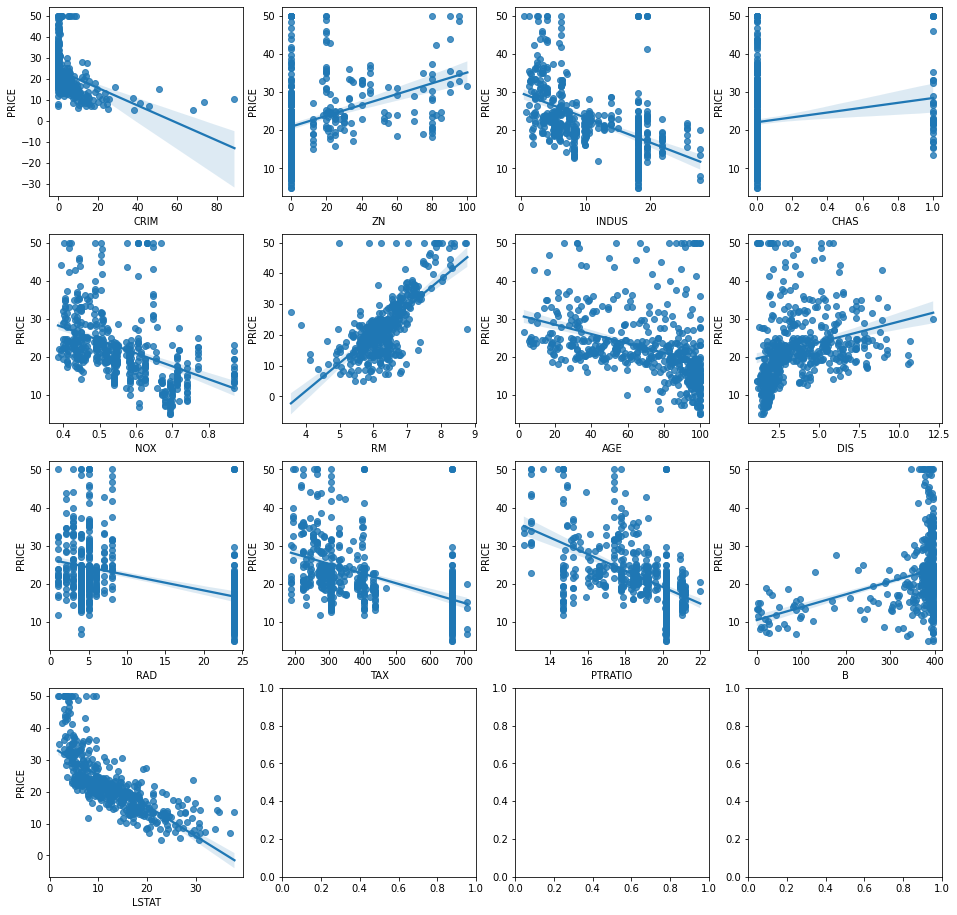

In [18]:
_, axs = plt.subplots(4, 4, figsize=(16, 16))

for (i, feature) in enumerate(df.columns[:-1]):
    row, col = i // 4, i % 4
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col], )
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression

In [25]:
for feature in df.columns[:-1]:
    lr = LinearRegression()
    lr.fit(df[feature].values.reshape(-1,1), boston.target)
    sc = lr.score(df[feature].values.reshape(-1,1), boston.target)
    print(f'{feature}: \t {sc : .4f}')

CRIM: 	  0.1508
ZN: 	  0.1299
INDUS: 	  0.2340
CHAS: 	  0.0307
NOX: 	  0.1826
RM: 	  0.4835
AGE: 	  0.1421
DIS: 	  0.0625
RAD: 	  0.1456
TAX: 	  0.2195
PTRATIO: 	  0.2578
B: 	  0.1112
LSTAT: 	  0.5441


- 다중 선형회귀

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=2022
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 13), (51, 13), (455,), (51,))

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
# R-squared

lr.score(X_test, y_test)

0.6739859403280901

In [29]:
# 계수, Weight
lr.coef_

array([-1.17731004e-01,  4.71909774e-02,  4.93242956e-02,  2.63851612e+00,
       -1.51441273e+01,  4.23531935e+00, -5.23740656e-03, -1.41099144e+00,
        2.91963685e-01, -1.19236187e-02, -8.95445411e-01,  9.80364965e-03,
       -5.27338430e-01])

In [30]:
# 절편, bias
lr.intercept_

30.950814924201126

In [31]:
# ?
lr._residues

9738.950486260948

- 회귀식
<pre>
y = -1.18 * CRIM + 4.72* ZN + 4.93 * INDUS ... _+ intercept

- 테스트 데이터에 적용

In [32]:
X_test[0], y_test[0]

(array([1.3960e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01,
        6.1670e+00, 9.0000e+01, 2.4210e+00, 5.0000e+00, 3.8400e+02,
        2.0900e+01, 3.9269e+02, 1.2330e+01]), 20.1)

In [33]:
# Weight와 bias를 이용하여 직접 구한 값
np.dot(lr.coef_,X_test[0]) + lr.intercept_

21.227539118774818

In [39]:
# predict method
lr.predict(X_test[0].reshape(1,-1))   
# lr.predict(X_test[:1]) 도 가능. 2차원으로 나옴

array([21.22753912])

In [55]:
# 10개의 테스트에 대해서 적용
for i in range(10):
    pred1 = np.dot(lr.coef_,X_test[i]) + lr.intercept_
    pred2 = lr.predict(X_test[i].reshape(1,-1))
    # predict는 array로 나오니 [0] 붙여줘야 나옴
    print(f'실제값 : {y_test[i]},\t함수: {pred1:.4f},\t예측: {pred2[0]:.4f}')

실제값 : 20.1,	함수: 21.2275,	예측: 21.2275
실제값 : 11.9,	함수: 7.0638,	예측: 7.0638
실제값 : 20.6,	함수: 21.4743,	예측: 21.4743
실제값 : 33.2,	함수: 35.7832,	예측: 35.7832
실제값 : 20.8,	함수: 18.2366,	예측: 18.2366
실제값 : 13.5,	함수: 13.4321,	예측: 13.4321
실제값 : 24.7,	함수: 24.7007,	예측: 24.7007
실제값 : 13.9,	함수: 13.0563,	예측: 13.0563
실제값 : 10.4,	함수: 6.3579,	예측: 6.3579
실제값 : 19.7,	함수: 13.6734,	예측: 13.6734


### 회귀는 꼭 선형회귀를 써야 하는가?
- LinearRegression, 결정트리, SVM , XGBoost

In [56]:
from sklearn.metrics import r2_score, mean_squared_error

#### 1. 선형회귀

In [61]:
pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)
print(r2_lr, mse_lr)

0.6739859403280901 27.36719446205099


#### 2. Decision Tree

In [62]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred_dtr = dtr.predict(X_test)
r2_dtr = r2_score(y_test, pred_dtr)
mse_dtr = mean_squared_error(y_test, pred_dtr)
print(r2_dtr, mse_dtr)

0.7679334800460748 19.480784313725493


#### 3. SVM

In [66]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)
r2_svr = r2_score(y_test, pred_svr)
mse_svr = mean_squared_error(y_test, pred_svr)
print(r2_svr, mse_svr)

0.2758473099781893 60.78887367001428


#### 4. XGBoost

In [68]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
pred_xgr = xgr.predict(X_test)
r2_xgr = r2_score(y_test, pred_xgr)
mse_xgr = mean_squared_error(y_test, pred_xgr)
print(r2_xgr, mse_xgr)

[01:16:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8066612215665507 16.229790677642647


#### 5. RandomForest

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=2022)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
print(r2_rf, mse_rf)

0.817419113329868 15.326721294117627


### 6. 비교

In [70]:
print('LR\tDT\tSVM\tRF\tXGB')
print(f'{r2_lr:.4f}\t{r2_dtr:.4f}\t{r2_svr:.4f}\t{r2_rf:.4f}\t{r2_xgr:.4f}\t')
print(f'{mse_lr:.4f}\t{mse_dtr:.4f}\t{mse_svr:.4f}\t{mse_rf:.4f}\t{mse_xgr:.4f}\t')

LR	DT	SVM	RF	XGB
0.6740	0.7679	0.2758	0.8174	0.8067	
27.3672	19.4808	60.7889	15.3267	16.2298	


In [72]:
df = pd.DataFrame({
    'y_test' : y_test,
    'LR': pred_lr,
    'DT': pred_dtr,
    'SVM': pred_svr,
    'RF': pred_rf,
    'XGB': pred_xgr
})
df.head()

,y_test,LR,DT,SVM,RF,XGB
0,20.1,21.227539,19.3,20.644693,19.934,20.255072
1,11.9,7.063817,13.8,16.130347,12.616,17.174437
2,20.6,21.474262,20.6,17.155498,21.612,20.817535
3,33.2,35.783213,33.1,24.229946,35.803,33.393593
4,20.8,18.236587,23.1,15.514814,20.495,19.065611


In [77]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor({
    ('DT', dtr),
    ('RF', rf),
    ('XGB', xgr)
})
vr.fit(X_train, y_train)
vr.score(X_test, y_test)

[01:25:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8298220546335549

In [78]:
from sklearn.ensemble import VotingRegressor
vr2 = VotingRegressor({
    ('LR', lr),
    ('DT', dtr),
    ('RF', rf),
    ('SVM', svr),
    ('XGB', xgr)
})
vr2.fit(X_train, y_train)
vr2.score(X_test, y_test)

[01:25:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8191607111524772